### Merger Rate of Black Holes in a Primordial Black Hole Cluster

###### Code Writed by Tadeo D.
###### Dedicated to the Moon of my life.
**References:** [arXiv:2105.14523](https://arxiv.org/pdf/2105.14523.pdf).

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import math
import seaborn as sns
from scipy import stats
from astropy import constants as const
import csv
from scipy import constants
from scipy.integrate import odeint
from tqdm import tqdm
from scipy import integrate
from scipy.integrate import quad, dblquad
from astropy.cosmology import Planck18 as cosmo# WMAP9 as cosmo #
import astropy.units as u
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sympy import *
from sympy import simplify
import pandas as pd

In [2]:
H0 = cosmo.H(0)  #cosmo.H(0)  <Quantity 67.66 km / (Mpc s)>
G = const.G
c = const.c
z_r = 5000 #3450
z_eq = 3411
z_0 = 0
z_init = 6.900e9
rho_c0 = (3*(H0**2))/(8*math.pi*G)
rho_eq = cosmo.critical_density(3411)
rho_crit = cosmo.critical_density(0)
Omega_DM = cosmo.Odm(0)
Omega_M = cosmo.Om(0)
Omega_R = 8.4e-5
Omega_lmb = 1-Omega_M - Omega_R
result_i=0
result_j=0

$$\rho_{i}(r) = \rho_{0,i}\left(\frac{r}{r_{0}}\right)^{-1} \left(1 + \frac{r^{2}}{r^{2}_{0}}\right)^{-2}$$

In [3]:
M = 10**5 * u.M_sun#M is the total mass of the cluster
R = 0.9*u.parsec #Scale factor that determines the core radius
v_rel = (G*M/R)**(1./2.)#The characteristic velocity of the PBHs
m_i = 300.*u.M_sun
m_j = 30.*u.M_sun
#error=1

if m_i==m_j:
    N_i = M/(2*m_i)
    N_j = M/(2*m_j) 
if m_j>m_i:
    zetha = (m_j/m_i)
    N_i = (M/(zetha*m_i))
    N_j =  N_i - (M/(zetha*m_j))
if m_i>m_j:
    zetha = (m_i/m_j)
    N_j = (M/(zetha*m_j))
    N_i = N_j - (M/(zetha*m_i))

M_i_t = (N_i*m_i)
M_j_t = (N_j*m_j)
    
print("Cluster Propierities\n")
print("M =\t", M)
print("R =\t", R)
print("m_i =\t", m_i, "\t\t N_i =\t", N_i)
print("m_j =\t", m_j, "\t\t N_j =\t", N_j)
#print("M_t = ", (M_i_t + M_j_t))
print("\t\t\t\t N_total =\t",N_i + N_j)
print("v_rel =\t", v_rel.to(u.parsec* u.s**(-1)))

Cluster Propierities

M =	 100000.0 solMass
R =	 0.9 pc
m_i =	 300.0 solMass 		 N_i =	 300.0
m_j =	 30.0 solMass 		 N_j =	 333.3333333333333
				 N_total =	 633.3333333333333
v_rel =	 7.084492493306903e-13 pc / s


In [4]:
interval = 0.1
r = np.arange(.1, R.value+interval, interval)
N_i_1_array = []
N_j_1_array = []
#N_total_casc = []
def V(radius):
    return (4/3)*math.pi*(radius**3.)

print("Numbers of PBHs into Cluster by spherical regions")
print("Primordial Black holes Masses:\t", "m_i = ",m_i,"\t m_j = ", m_j, "\n")
print("radius \t\t n_pbh_mi(r) \t\t n_pbh_mj(r) \t\t total n_pbh(r)")

if m_i==m_j:
    for i in r:
        i=i*u.parsec
        Ni_casc = round(float(N_i*(V(i)/V(R))))
        Nj_casc = round(float(N_j*(V(i)/V(R))))
        N_i = N_i - Ni_casc
        N_j = N_j - Nj_casc
        N_i_1_array.append(Ni_casc)
        N_j_1_array.append(Nj_casc)
        result_i = result_i + Ni_casc
        result_j = result_j + Nj_casc
        print("%.2f" %i.value," \t\t ",Ni_casc," \t\t ",Nj_casc, " \t\t ", Ni_casc + Nj_casc)
        #N_total_casc.append(Ni_casc + Nj_casc)
    print("\n Total numbers of PBHs into Cluster = ",result_i + result_j)
    N_i = M/(2*m_i)
    N_j = M/(2*m_j) 

    
if m_j>m_i:
    for i in r:
        i=i*u.parsec
        Ni_casc = round(float(N_i*(V(i)/V(R))))
        Nj_casc = round(float(N_j*(V(i)/V(R))))
        N_i = N_i - Ni_casc
        N_j = N_j - Nj_casc
        N_i_1_array.append(Ni_casc)
        N_j_1_array.append(Nj_casc)
        result_i = result_i + Ni_casc
        result_j = result_j + Nj_casc
        print("%.2f" %i.value," \t\t ",Ni_casc," \t\t ",Nj_casc, " \t\t ", Ni_casc + Nj_casc)
        #N_total_casc.append(Ni_casc + Nj_casc)
    print("\n Total numbers of PBHs into Cluster = ",result_i + result_j)
    zetha = (m_j/m_i)
    N_i = (M/(zetha*m_i))
    N_j =  N_i - (M/(zetha*m_j))
    
if m_i>m_j:
    for i in r:
        i=i*u.parsec
        Ni_casc = round(float(N_i*(V(i)/V(R))))
        Nj_casc = round(float(N_j*(V(i)/V(R))))
        N_i = N_i - Ni_casc
        N_j = N_j - Nj_casc
        N_i_1_array.append(Ni_casc)
        N_j_1_array.append(Nj_casc)
        result_i = result_i + Ni_casc
        result_j = result_j + Nj_casc
        print("%.2f" %i.value," \t\t ",Ni_casc," \t\t ",Nj_casc, " \t\t ", Ni_casc + Nj_casc)
        #N_total_casc.append(Ni_casc + Nj_casc)
    print("\n Total numbers of PBHs into Cluster = ",result_i + result_j)
    zetha = (m_i/m_j)
    N_j = (M/(zetha*m_j))
    N_i = N_j - (M/(zetha*m_i))
    
result_i=0
result_j=0

#print(N_i_1_array)

Numbers of PBHs into Cluster by spherical regions
Primordial Black holes Masses:	 m_i =  300.0 solMass 	 m_j =  30.0 solMass 

radius 		 n_pbh_mi(r) 		 n_pbh_mj(r) 		 total n_pbh(r)
0.10  		  0  		  0  		  0
0.20  		  3  		  4  		  7
0.30  		  11  		  12  		  23
0.40  		  25  		  28  		  53
0.50  		  45  		  50  		  95
0.60  		  64  		  71  		  135
0.70  		  72  		  79  		  151
0.80  		  56  		  63  		  119
0.90  		  24  		  26  		  50

 Total numbers of PBHs into Cluster =  633


In [5]:
#Masas en cada cascaron (se podría decir que la masa es función del radio)
M_i_1_value = []
M_j_1_value = []
print("Primordial Black holes Masses:\t", "m_i = ",m_i,"\t m_j = ", m_j, "\n")
print("radius \t\t  Mass_mi(r) \t\t Mass_mj(r)")
for h, i, j in zip(r, N_i_1_array, N_j_1_array):
    M_i_1 = i*m_i
    M_i_1_value.append(M_i_1)
    M_j_1 = j*m_j
    M_j_1_value.append(M_j_1)
    print("{0:.2f}".format(h), " \t\t ","{0:.2f}".format(M_i_1)," \t","{0:.2f}".format(M_j_1))

Primordial Black holes Masses:	 m_i =  300.0 solMass 	 m_j =  30.0 solMass 

radius 		  Mass_mi(r) 		 Mass_mj(r)
0.10  		  0.00 solMass  	 0.00 solMass
0.20  		  900.00 solMass  	 120.00 solMass
0.30  		  3300.00 solMass  	 360.00 solMass
0.40  		  7500.00 solMass  	 840.00 solMass
0.50  		  13500.00 solMass  	 1500.00 solMass
0.60  		  19200.00 solMass  	 2130.00 solMass
0.70  		  21600.00 solMass  	 2370.00 solMass
0.80  		  16800.00 solMass  	 1890.00 solMass
0.90  		  7200.00 solMass  	 780.00 solMass


In [6]:
Energy_it = G*((m_i*N_i)**(2.))/((2*R)*(1*u.M_sun))#According to the virial theorem, the total energy
print("E_i =\t", Energy_it.to(u.parsec**2.*u.s**(-2.)))

Energy_jt = G*((m_j*N_j)**(2.))/((2*R)*(1*u.M_sun))#According to the virial theorem, the total energy
print("E_j =\t", Energy_jt.to(u.parsec**2.*u.s**(-2.)))

E_i =	 2.032696372452734e-20 pc2 / s2
E_j =	 2.509501694386091e-22 pc2 / s2


In [7]:
#Ei_array = []
#Ej_array = []
#for i, j in zip(N_i_1_array, N_j_1_array):
    #Energy_i1 = G*((m_i*i)**(2.))/((2*R)*(1*u.M_sun))#According to the virial theorem, the total energy
   # Ei_array.append(Energy_i1.to(u.parsec**2.*u.s**(-2.)))
    #print("Ei =\t", Energy_i1.to(u.parsec**2.*u.s**(-2.)))
  #  Energy_j1 = G*((m_j*j)**(2.))/((2*R)*(1*u.M_sun))#According to the virial theorem, the total energy
 #   Ej_array.append(Energy_j1.to(u.parsec**2.*u.s**(-2.)))
    #print("Ej =\t", Energy_j1.to(u.parsec**2.*u.s**(-2.)))
#print(Ei_array,"\n",Ej_array)

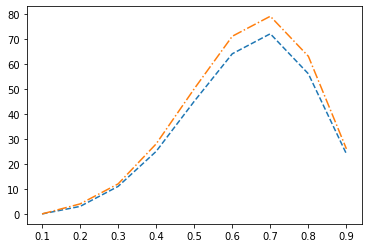

In [8]:
pl.plot(r, N_i_1_array,"--")
pl.plot(r, N_j_1_array, "-.")
#pl.plot(r, N_total_casc, "blue")

In [9]:
sigma = 2*math.pi*(85*math.pi/(6*math.sqrt(2)))**(2./7.) * (G**(2.) * (m_i+m_j)**(10./7.) * m_i**(2./7.) * m_j**(2./7.))/(c**(10./7.))
sigma = sigma.to(u.m**(32./7)/u.s**(18./7.))#.to(u.parsec**2)
print(sigma)
#print(sigma)
#sigma.to(u.AU**2)
#sigma.to(u.parsec**2.)

1.2299630460535196e+34 m(32/7) / s(18/7)


In [10]:
def f_i(E_i): ## eq. 19 shapiro
    return (24. * (2.)**(1./2.) * N_i * R**2. * E_i**(7./2.))/(7*(math.pi**(3.))*(G**5.)*(M**5.))

def f_j(E_j):
    return (24. * (2.)**(1./2.) * N_j * R**2. * E_j**(7./2.))/(7*(math.pi**(3.))*(G**5.)*(M**5.))

def rho_i(r):## eq. 20
    return ((3*M_i_t)/(4*(math.pi)*(R**(3.))))*((1 + r**(2.)/R**(2.))**(-5./2.))

def rho_j(r):
    return ((3*M_j_t)/(4*(math.pi)*(R**(3.))))*((1 + r**(2.)/R**(2.))**(-5./2.))

def phi(r):## eq. 21
    return (G*M/R)*((1 + r**(2.)/R**(2.))**(-1./2.))

def integrant(E):
    return E**(7./2.)*((2*(a - E))**(3./2.))

In [11]:
print("f_i(E_i) \t\t\t\t f_j(E_j)")
print(f_i(Energy_it).to(u.s**3. / (u.m**6.)),"\t\t",f_j(Energy_jt).to(u.s**3. / (u.m**6.)))
#PH_i(1.*u.parsec)
#rho_i(1*u.parsec)

f_i(E_i) 				 f_j(E_j)
2.803079300876216e-45 s3 / m6 		 6.511713867535264e-52 s3 / m6


In [12]:
def n_i_1(r):
    return (rho_i(r)/m_i)

def n_j_1(r):
    return (rho_j(r)/m_j)

print("n_i_1 \t\t\t\t\t n_j_1")
for h in r:
    h=h*u.parsec
    print(n_i_1(h),"\t\t",n_j_1(h))#,"\t",n_i_1(h, M))

n_i_1 					 n_j_1
95.2758941685541 1 / pc3 		 105.8621046317268 1 / pc3
87.09041298865294 1 / pc3 		 96.76712554294772 1 / pc3
75.49381815673054 1 / pc3 		 83.88202017414505 1 / pc3
62.60201735788754 1 / pc3 		 69.55779706431949 1 / pc3
50.147928863891316 1 / pc3 		 55.71992095987924 1 / pc3
39.17896959909298 1 / pc3 		 43.532188443436645 1 / pc3
30.10643161572556 1 / pc3 		 33.45159068413951 1 / pc3
22.913828523418456 1 / pc3 		 25.459809470464954 1 / pc3
17.367212888833066 1 / pc3 		 19.296903209814516 1 / pc3


In [13]:
alfa = ((4*24*(2**(1/2))*(R**(2.)))/(math.pi*(G**(5.))*(M**(5.))*(2**(17./2.))))

def vel_i(r):
    return (alfa**(1./2.))*(N_i**(1./2.))*((phi(r)**(3))/(n_i_1(r)**(1./2.)))

def vel_j(r):
    return (alfa**(1./2.))*(N_j**(1./2.))*((phi(r)**(3))/(n_j_1(r)**(1./2.)))

print("vel_i \t\t\t\t vel_j")
for h in r:
    h = h*u.parsec
    print(vel_i(h).to(u.km/u.s), "\t", vel_j(h).to(u.km/u.s))

vel_i 				 vel_j
15.410335130226237 km / s 	 15.410335130226233 km / s
15.27252395995121 km / s 	 15.27252395995121 km / s
15.055837517536794 km / s 	 15.05583751753679 km / s
14.776535210745944 km / s 	 14.776535210745942 km / s
14.45237028925435 km / s 	 14.452370289254349 km / s
14.099998976470422 km / s 	 14.09999897647042 km / s
13.733451827675042 km / s 	 13.733451827675038 km / s
13.36360240544069 km / s 	 13.363602405440686 km / s
12.998307084140249 km / s 	 12.998307084140245 km / s


In [14]:
betha = (3./(4*math.pi*(R**(3.))))
etha = (G*M/R)

In [15]:
def GAMMA(r1,r0): #Equation (11)
    a=(r1**(2.)/((R.value)**(2.)))
    b=(r0**(2.)/(R**(2.)))
    return (r1**(2.))*((1.+(a))**(-9./4.))*(1./((1. + a)**(1./4.)) + 1./((1. + b)**(1./4.)))**(3./7.) - abs((1./((1. + a)**(1./4.)) - 1./((1. + b)**(1./4.))))**(3./7.)

In [16]:
def r_star(N_ij, Mi):
    kappa = (1-((8*24*(2**(1./2.))*N_ij*m_i)/(3*Mi*2**(17./2.))))*(1*u.M_sun)
    r_star_quad = (4.*(kappa**(2.))*(Mi*R)**(2.))/((m_i*N_ij)**(4.)) - R**(2.)
    r_star_value = (abs(r_star_quad))**(1./2.)
    return r_star_value

#for i,j in zip(N_i_1_array, M_i_1_value):
#    print(r_star(i,j))
#r_star(N_i, M_i_t)

In [17]:
print("Primordial Black holes Masses:\t", "m_i = ",m_i,"\t m_j = ", m_j, "\n")
print("radius \t merger_rate \t\t\t Number_Mergers at Universe's time \t time to the first Merger\n")

colm1 = []
colm2 = []
colm3 = []
colm4 = []

for h in r:
    r0 = h*u.parsec
    colm1.append("%.2f"%r0.value)
    I, err = quad(GAMMA, h+interval, 0., args=(r0,))
    nash_rubi = (14*math.pi/3.)*sigma*(N_i)*(n_j_1(r0)/vel_j(r0))*(alfa**(-2./7.))*(betha**(9./7.))*(etha**(-12./7.))
    #I = I*units
    merger = (I*nash_rubi*(u.parsec**(3.))).to(u.yr**(-1))
    colm2.append(merger.value)
    colm3.append((merger*(cosmo.age(0).to(u.yr))).value)
    colm4.append(((merger**(-1.)).to(u.Gyr)).value)
    print("%.2f"%r0.value,"\t",merger,"\t\t", merger*(cosmo.age(0).to(u.yr)),"\t\t",(merger**(-1.)).to(u.Gyr))#/(cosmo.age(0).to(u.yr)))


Primordial Black holes Masses:	 m_i =  300.0 solMass 	 m_j =  30.0 solMass 

radius 	 merger_rate 			 Number_Mergers at Universe's time 	 time to the first Merger

0.10 	 6.397152735675917e-12 1 / yr 		 0.0881968110262015 		 156.31954422834974 Gyr
0.20 	 1.1996229414078653e-11 1 / yr 		 0.1653906389884975 		 83.3595261879879 Gyr
0.30 	 1.7304960581826204e-11 1 / yr 		 0.23858150669743705 		 57.786898460214196 Gyr
0.40 	 2.1229569860178706e-11 1 / yr 		 0.2926896446732861 		 47.10411028514274 Gyr
0.50 	 2.3487584497267182e-11 1 / yr 		 0.323820633485084 		 42.57568504400066 Gyr
0.60 	 2.427169682354188e-11 1 / yr 		 0.3346311001913253 		 41.200250945375544 Gyr
0.70 	 2.3943612295682306e-11 1 / yr 		 0.3301078364363613 		 41.76479253217475 Gyr
0.80 	 2.28661925978504e-11 1 / yr 		 0.31525357464022685 		 43.732685086104276 Gyr
0.90 	 2.133934047114823e-11 1 / yr 		 0.2942030394962544 		 46.86180443824148 Gyr


In [18]:
for i in colm4:
    if i<cosmo.age(0).value:
        delta_t_1 = (np.amin(colm4))*u.Gyr
        delta_t_1 = round((delta_t_1/10.).to(u.yr).value)
    else:
        delta_t_1 = (10e9)
        #print("To get mergers we need age of universe, the system going to use")
        #print("{:.2e}".format(delta_t_1))
            
print("Minimum time to get 1st Generation: \n T_merger = ","{:.1e}".format(delta_t_1)*u.yr)

Minimum time to get 1st Generation: 
 T_merger =  1e+10 yr


In [19]:
number_col_array = []
prob_array = []
print("Primordial Black holes Masses:\t", "m_i = ",m_i,"\t m_j = ", m_j,N_i,N_j,  "\n")
print("Merger_Rate \t\t\t | Probability \t\t | Collision Number \t |")
print("----------------------------------------------------------------------------------")

def integrand_n_i(r1):
    a=(r1**(2.)/((R.value)**(2.)))
    return (R.value**(2.))*((1 + a)**(-5./2.))

def integrand_n_i_b(r1):
    a=(r1**(2.)/((R.value)**(2.)))
    return (r1**(2.))*((1 + a)**(-5./2.))

#for h in r:
#    I, err = quad(integrand_n_i, 0 , h+interval)
#    resultado = betha*N_i*I
#    print(resultado*u.parsec**3.)
    
#for h in r:
#    I, err = quad(integrand_n_i_b, 0 , h+interval)
#    resultado = 3*N_i*(R**(-3.))*I
#    print(resultado*u.parsec**3.)

for h,i in zip(colm2, r):
    GAMMA_value = h*(1/u.yr)
    Prob = GAMMA_value*(delta_t_1*u.yr) #integration dt
    prob_array.append(Prob)
    #I, err = quad(integrand_n_i, 0 , i+interval)
    #N_j_r = betha*N_j*I*u.parsec**3.
    I, err = quad(integrand_n_i_b, 0 , i+interval)
    N_j_r = 3*N_j*(R**(-3.))*I*u.parsec**3.
    Num_Col = N_j_r*Prob #numero de choques
    #Num_Col = N_j*Prob
    number_col_array.append(Num_Col)
    print(GAMMA_value, " \t | " , Prob, " \t\t |" , Num_Col, " \t | ")

Primordial Black holes Masses:	 m_i =  300.0 solMass 	 m_j =  30.0 solMass 300.0 333.3333333333333 

Merger_Rate 			 | Probability 		 | Collision Number 	 |
----------------------------------------------------------------------------------
6.397152735675917e-12 1 / yr  	 |  0.06397152735675918  		 | 0.21768427791153658  	 | 
1.1996229414078653e-11 1 / yr  	 |  0.11996229414078653  		 | 1.2645136094131917  	 | 
1.7304960581826204e-11 1 / yr  	 |  0.17304960581826204  		 | 3.864307983955064  	 | 
2.1229569860178706e-11 1 / yr  	 |  0.21229569860178707  		 | 8.105338470565039  	 | 
2.3487584497267182e-11 1 / yr  	 |  0.23487584497267183  		 | 13.362633568708466  	 | 
2.427169682354188e-11 1 / yr  	 |  0.2427169682354188  		 | 18.72224721809689  	 | 
2.3943612295682306e-11 1 / yr  	 |  0.23943612295682307  		 | 23.403799805373446  	 | 
2.28661925978504e-11 1 / yr  	 |  0.228661925978504  		 | 26.948066409762756  	 | 
2.133934047114823e-11 1 / yr  	 |  0.2133934047114823  		 | 29.2106940275

## SECOND GENERATION

In [20]:
Ni_2_values = []
Nj_2_values = []
N_k_values = []
m_k = m_i + m_j
N_k_tot = 0.
print("PBHs with mass:  m_i = ", m_i," \t m_j = ", m_j, "\t m_k = ", m_k,"\n")# \t  Number_pbhs at cluster")
for h in number_col_array:
    number_binaries = round(float(h))#Nuevos Agujeros Negros
    N_k_tot = N_k_tot + number_binaries
print("N_k = \t ",N_k_tot, "PBHs with ", m_k,"\n\n")
N_i_2 = N_i - N_k_tot
N_j_2 = N_j - N_k_tot
print("Total Numbers PBHs for species 2nd Generation with", m_i)
print("N_i_2 \t\t\t N_j_2")
print(N_i_2,"\t\t",N_j_2)
M_i_2 = (N_i_2*m_i)
M_j_2 = (N_j_2*m_j)
M_k = N_k_tot*m_k
#print(M_i_2, M_j_2, M_k)
#print(M- (M_i_2 + M_j_2 + M_k))

PBHs with mass:  m_i =  300.0 solMass  	 m_j =  30.0 solMass 	 m_k =  330.0 solMass 

N_k = 	  124.0 PBHs with  330.0 solMass 


Total Numbers PBHs for species 2nd Generation with 300.0 solMass
N_i_2 			 N_j_2
176.0 		 209.33333333333331


In [21]:
#Ei_2_array = []
#Ej_2_array = []
#Ek_array=[]
#for i,j,k in zip (Ni_2_values, Nj_2_values, N_k_values):
#    Energy_mi2 = G*(m_i*i)**(2.)/((2*R)*(1*u.M_sun)) #According to the virial theorem, the total energy
#    Energy_mj2 = G*((m_j)*j)**(2.)/((2*R)*(1*u.M_sun)) #According to the virial theorem, the total energy
#    Energy_mk = G*((m_k)*k)**(2.)/((2*R)*(1*u.M_sun)) #According to the virial theorem, the total energy
#   Ei_2_array.append(Energy_mi2.to(u.parsec**2.*u.s**(-2.)))
#   Ej_2_array.append(Energy_mj2.to(u.parsec**2.*u.s**(-2.)))
#Ek_array.append(Energy_mk.to(u.parsec**2.*u.s**(-2.)))
print("M =\t", M)
print("R =\t", R)
print("v_rel =\t", v_rel.to(u.parsec* u.s**(-1)))
print("m_i_2 =\t", m_i)
print("m_j_2 =\t", m_j)
print("m_k = \t", m_k)
#print("E =\t", Energy.to(u.parsec**2.*u.s**(-2.)))
#print("Energy to m_i = \t", Energy_mi.to(u.parsec**2.*u.s**(-2.)))
#print("Energy to m_j_2 = \t", Energy_mj2.to(u.parsec**2.*u.s**(-2.)))
print("\n")
#print(Ei_2_array,"\n",Ej_2_array,"\n",Ek_array)

M =	 100000.0 solMass
R =	 0.9 pc
v_rel =	 7.084492493306903e-13 pc / s
m_i_2 =	 300.0 solMass
m_j_2 =	 30.0 solMass
m_k = 	 330.0 solMass




In [22]:
#print("M_i \t\t\t M_j \t\t\t M_k")# \t\t\t  vel_rel_i \t\t\t  vel_rel_j")
#Mi_array = []
#Mj_array = []
#Mk_array = []
#for i,j,k in zip(Ni_2_values, Nj_2_values, N_k_values):
#    Mi = i*u.M_sun
#    Mj = j*u.M_sun
#    Mk = k*u.M_sun
#    Mi_array.append(Mi)
#    Mj_array.append(Mj)
#    Mk_
#    print(Mi,"\t\t",Mj,"\t ")#, v_ri.to(u.km/u.s)," \t ",v_rj.to(u.km/u.s))

In [23]:
print(m_i, m_j, m_k, "\n")

sigma_2_ij = 2*math.pi*(85*math.pi/(6*math.sqrt(2)))**(2./7.) * (G**(2.) * (m_i+m_j)**(10./7.) * m_i**(2./7.) * m_j**(2./7.))/(c**(10./7.))
sigma_2_ij = sigma_2_ij.to(u.parsec**(32./7)/u.yr**(18./7.))#.to(u.parsec**2)
#print(m_i, m_j_2)
print(sigma_2_ij)

sigma_2_ik = 2*math.pi*(85*math.pi/(6*math.sqrt(2)))**(2./7.) * (G**(2.) * (m_i+m_k)**(10./7.) * m_i**(2./7.) * m_k**(2./7.))/(c**(10./7.))
sigma_2_ik = sigma_2_ik.to(u.parsec**(32./7)/u.yr**(18./7.))#.to(u.parsec**2)
#print(m_i, m_j_2)
print(sigma_2_ik)

sigma_2_jk = 2*math.pi*(85*math.pi/(6*math.sqrt(2)))**(2./7.) * (G**(2.) * (m_j+m_k)**(10./7.) * m_j**(2./7.) * m_k**(2./7.))/(c**(10./7.))
sigma_2_jk = sigma_2_jk.to(u.parsec**(32./7)/u.yr**(18./7.))#.to(u.parsec**2)
#print(m_i, m_j_2)
print(sigma_2_jk)



300.0 solMass 30.0 solMass 330.0 solMass 

9.849497123693983e-23 pc(32/7) / yr(18/7)
4.921932979162547e-22 pc(32/7) / yr(18/7)
1.1461044468837523e-22 pc(32/7) / yr(18/7)


In [24]:
def f_i2(E): ## eq. 19 shapiro
    return (24. * (2.)**(1./2.) * Ni_2 * R**2. * E**(7./2.))/(7*(math.pi**(3.))*(G**5.)*(M**5.))

def f_j2(E):
    return (24. * (2.)**(1./2.) * Nj_2 * R**2. * E**(7./2.))/(7*(math.pi**(3.))*(G**5.)*(M**5.))

def f_k(E):
    return (24. * (2.)**(1./2.) * N_k_tot * R**2. * E**(7./2.))/(7*(math.pi**(3.))*(G**5.)*(M**5.))

def rho_i2(r):## eq. 20
    return ((3*M_i_2)/(4*(math.pi)*(R**(3.))))*((1 + r**(2.)/R**(2.))**(-5./2.))

def rho_j2(r):
    return ((3*M_j_2)/(4*(math.pi)*(R**(3.))))*((1 + r**(2.)/R**(2.))**(-5./2.))

def rho_k(r):
    return ((3*M_k)/(4*(math.pi)*(R**(3.))))*((1 + r**(2.)/R**(2.))**(-5./2.))

def phi(r):## eq. 21
    return (G*M/R)*((1 + r**(2.)/R**(2.))**(-1./2.))

#def integrant(E):
#    return E**(7./2.)*((2*(a - E))**(3./2.))

In [25]:
#print("N_i \t\t f_i2 \t\t\t\t\t\t N_j \t\t f_j2")
#for h,i,j,k,l in zip (r, Ni_2_values, Nj_2_values, Ei_2_array, Ej_2_array):
#    h = h*u.parsec
#    print(i,"\t",f_i2(k, i).to(u.s**3./(u.m**6.))," \t\t ",j,"\t",f_j2(l, j).to(u.s**3./(u.m**6.)))
#print("\n")
#print("M_i \t\t\t rho_i2 \t\t\t\t M_j \t\t\t  rho_j2")
#for h,k,l in zip (r, Mi_array, Mj_array):
#    h = h*u.parsec
#    print(k,"\t",rho_i2(h,k),"\t",l,"\t",rho_j2(h,l))

In [26]:
def n_i_2(r):
    return (rho_i2(r)/m_i)

def n_j_2(r):
    return (rho_j2(r)/m_j)

def n_k(r):
    return (rho_k(r)/m_k)
    

In [27]:
alfa_2 = ((4*24*(2**(1/2))*(R**(2.)))/(math.pi*(G**(5.))*(M**(5.))*(2**(17./2.))))

def vel_i2(r):
    return (alfa_2**(1./2.))*(N_i_2**(1./2.))*((phi(r)**(3))/(n_i_2(r)**(1./2.)))

def vel_j2(r):
    return (alfa_2**(1./2.))*(N_j_2**(1./2.))*((phi(r)**(3))/(n_j_2(r)**(1./2.)))

def vel_k(r):
    return (alfa_2**(1./2.))*(N_k_tot**(1./2.))*((phi(r)**(3))/(n_k(r)**(1./2.)))


#for h,i,j,k,l in zip(r, Ni_2_values, Nj_2_values, Mi_array, Mj_array):
#    h = h*u.parsec
#    print(vel_i2(h,i,k).to(u.km/u.s), "\t",vel_j2(h,j,l).to(u.km/u.s))

#print("\n")
#for h in r:
    #h = h*u.parsec
    #print("r = ","%.2f"%h.value)
    #print("vel_rel = ")
    #for i,j,k,l in zip(Ni_2_values, Nj_2_values, Mi_array, Mj_array):
    #    print(vel_i2(h,i,k).to(u.km/u.s), "\t", vel_j2(h,j,l).to(u.km/u.s))

In [28]:
#CONSTANTS SECOND GENERATION
betha_2 = (3./(4*math.pi*(R**(3.))))
etha_2 = (G*M/R)
#zetha2 = alfa**(-1./2.) * betha**(3./2.) * etha**(-3.) * alfa**(3./14.) * etha**(9./7.) * betha**(-3./14.)
#print(zetha)

In [29]:
def GAMMA_2(r1,r0): #Equation (11)
    a=(r1**(2.)/((R.value)**(2.)))
    b=(r0**(2.)/(R**(2.)))
    return (r1**(2.))*((1.+(a))**(-9./4.))*(1./((1. + a)**(1./4.)) + 1./((1. + b)**(1./4.)))**(3./7.) - abs((1./((1. + a)**(1./4.)) - 1./((1. + b)**(1./4.))))**(3./7.)



colm1_2gnd_ij = []
colm2_2gnd_ij = []
colm3_2gnd_ij = []
colm4_2gnd_ij = []
print("Black holes Masses:\t", m_i, m_j, "\n")
print("radius \t merger_rate \t\t\t Number_Mergers at Universe's time \t time to the first Merger\n")

for h in r :
    r0 = h*u.parsec
    colm1_2gnd_ij.append("%.2f"%r0.value)
    I, err = quad(GAMMA_2, h+interval, 0., args=(r0,))
    nash_rubi = (14*math.pi/3.)*sigma_2_ij*(N_i_2)*(n_j_2(r0)/vel_j2(r0))*(alfa_2**(-2./7.))*(betha_2**(9./7.))*(etha_2**(-12./7.))
    #I = I*units
    merger2 = (I*nash_rubi*(u.parsec**(3.))).to(u.yr**(-1))
    colm2_2gnd_ij.append(merger2.value)
    colm3_2gnd_ij.append((merger2*(cosmo.age(0).to(u.yr))).value)
    colm4_2gnd_ij.append(((merger2**(-1.)).to(u.Gyr)).value)
    #print("%.2f"%r0.value,"\t",merger*u.parsec**(3))
    print("%.2f"%r0.value,"\t",merger2,"\t\t", merger2*(cosmo.age(0).to(u.yr)),"\t\t",(merger2**(-1.)).to(u.Gyr))#/(cosmo.age(0).to(u.yr)))

Black holes Masses:	 300.0 solMass 30.0 solMass 

radius 	 merger_rate 			 Number_Mergers at Universe's time 	 time to the first Merger

0.10 	 2.356881658562664e-12 1 / yr 		 0.032494057097013855 		 424.2894403997554 Gyr
0.20 	 4.41973081559769e-12 1 / yr 		 0.06093432182040317 		 226.2581233388459 Gyr
0.30 	 6.375608943960394e-12 1 / yr 		 0.0878997892408492 		 156.84776290228697 Gyr
0.40 	 7.821539658352901e-12 1 / yr 		 0.10783467015483164 		 127.85206540915054 Gyr
0.50 	 8.653452464379964e-12 1 / yr 		 0.11930415659279982 		 115.56081276418635 Gyr
0.60 	 8.9423403550416e-12 1 / yr 		 0.12328702080649132 		 111.82754852718286 Gyr
0.70 	 8.821465266057392e-12 1 / yr 		 0.12162052981879583 		 113.35985234196058 Gyr
0.80 	 8.424515118184166e-12 1 / yr 		 0.11614782365945185 		 118.70119359647393 Gyr
0.90 	 7.861982078650365e-12 1 / yr 		 0.10839224516480844 		 127.19438813216756 Gyr


In [30]:
def GAMMA_2(r1,r0): #Equation (11)
    a=(r1**(2.)/((R.value)**(2.)))
    b=(r0**(2.)/(R**(2.)))
    return (r1**(2.))*((1.+(a))**(-9./4.))*(1./((1. + a)**(1./4.)) + 1./((1. + b)**(1./4.)))**(3./7.) - abs((1./((1. + a)**(1./4.)) - 1./((1. + b)**(1./4.))))**(3./7.)



colm1_2gnd_ik = []
colm2_2gnd_ik = []
colm3_2gnd_ik = []
colm4_2gnd_ik = []
print("m_i and m_k")
print("Black holes Masses:\t", m_i, m_k, "\n")
print("radius \t merger_rate \t\t\t Number_Mergers at Universe's time \t time to the first Merger\n")

for h in r :
    r0 = h*u.parsec
    colm1_2gnd_ik.append("%.2f"%r0.value)
    I, err = quad(GAMMA_2, h+interval, 0., args=(r0,))
    nash_rubi = (14*math.pi/3.)*sigma_2_ik*(N_i_2)*(n_k(r0)/vel_k(r0))*(alfa_2**(-2./7.))*(betha_2**(9./7.))*(etha_2**(-12./7.))
    #I = I*units
    merger2 = (I*nash_rubi*(u.parsec**(3.))).to(u.yr**(-1))
    colm2_2gnd_ik.append(merger2.value)
    colm3_2gnd_ik.append((merger2*(cosmo.age(0).to(u.yr))).value)
    colm4_2gnd_ik.append(((merger2**(-1.)).to(u.Gyr)).value)
    #print("%.2f"%r0.value,"\t",merger*u.parsec**(3))
    print("%.2f"%r0.value,"\t",merger2,"\t\t", merger2*(cosmo.age(0).to(u.yr)),"\t\t",(merger2**(-1.)).to(u.Gyr))#/(cosmo.age(0).to(u.yr)))

m_i and m_k
Black holes Masses:	 300.0 solMass 330.0 solMass 

radius 	 merger_rate 			 Number_Mergers at Universe's time 	 time to the first Merger

0.10 	 6.976582124230671e-12 1 / yr 		 0.09618533754681952 		 143.33666288064705 Gyr
0.20 	 1.308280154414484e-11 1 / yr 		 0.1803710843180804 		 76.43622786952284 Gyr
0.30 	 1.887237707838297e-11 1 / yr 		 0.2601912981559431 		 52.98749573764252 Gyr
0.40 	 2.315246230805834e-11 1 / yr 		 0.3192003423003033 		 43.19195024245627 Gyr
0.50 	 2.5614999190366832e-11 1 / yr 		 0.3531510558486591 		 39.03962645355364 Gyr
0.60 	 2.6470133382859893e-11 1 / yr 		 0.3649406928783876 		 37.77842693635712 Gyr
0.70 	 2.6112332225551748e-11 1 / yr 		 0.36000772936165387 		 38.296081382629936 Gyr
0.80 	 2.493732401255903e-11 1 / yr 		 0.3438080259002039 		 40.10053362166591 Gyr
0.90 	 2.327217551702785e-11 1 / yr 		 0.32085081458150144 		 42.96976873813612 Gyr


In [31]:
def GAMMA_2(r1,r0): #Equation (11)
    a=(r1**(2.)/((R.value)**(2.)))
    b=(r0**(2.)/(R**(2.)))
    return (r1**(2.))*((1.+(a))**(-9./4.))*(1./((1. + a)**(1./4.)) + 1./((1. + b)**(1./4.)))**(3./7.) - abs((1./((1. + a)**(1./4.)) - 1./((1. + b)**(1./4.))))**(3./7.)



colm1_2gnd_jk = []
colm2_2gnd_jk = []
colm3_2gnd_jk = []
colm4_2gnd_jk = []
print("m_j and m_k")
print("Black holes Masses:\t", m_j, m_k, "\n")
print("radius \t merger_rate \t\t\t Number_Mergers at Universe's time \t time to the first Merger\n")

for h in r :
    r0 = h*u.parsec
    colm1_2gnd_jk.append("%.2f"%r0.value)
    I, err = quad(GAMMA_2, h+interval, 0., args=(r0,))
    nash_rubi = (14*math.pi/3.)*sigma_2_jk*(N_j_2)*(n_k(r0)/vel_k(r0))*(alfa_2**(-2./7.))*(betha_2**(9./7.))*(etha_2**(-12./7.))
    #I = I*units
    merger2 = (I*nash_rubi*(u.parsec**(3.))).to(u.yr**(-1))
    colm2_2gnd_jk.append(merger2.value)
    colm3_2gnd_jk.append((merger2*(cosmo.age(0).to(u.yr))).value)
    colm4_2gnd_jk.append(((merger2**(-1.)).to(u.Gyr)).value)
    #print("%.2f"%r0.value,"\t",merger*u.parsec**(3))
    print("%.2f"%r0.value,"\t",merger2,"\t\t", merger2*(cosmo.age(0).to(u.yr)),"\t\t",(merger2**(-1.)).to(u.Gyr))#/(cosmo.age(0).to(u.yr)))

m_j and m_k
Black holes Masses:	 30.0 solMass 330.0 solMass 

radius 	 merger_rate 			 Number_Mergers at Universe's time 	 time to the first Merger

0.10 	 1.932221605459597e-12 1 / yr 		 0.02663931765253652 		 517.5389806088731 Gyr
0.20 	 3.623389125706654e-12 1 / yr 		 0.04995525028066688 		 275.98471080717127 Gyr
0.30 	 5.226859526326182e-12 1 / yr 		 0.07206211277917586 		 191.3194710826432 Gyr
0.40 	 6.412264213997543e-12 1 / yr 		 0.08840515124456555 		 155.9511533877639 Gyr
0.50 	 7.094283988653645e-12 1 / yr 		 0.09780807965145175 		 140.95855220898486 Gyr
0.60 	 7.331120412690512e-12 1 / yr 		 0.10107331626498617 		 136.40479813548737 Gyr
0.70 	 7.232024449323569e-12 1 / yr 		 0.09970709158415397 		 138.2738688187832 Gyr
0.80 	 6.906596293342769e-12 1 / yr 		 0.09522045092360215 		 144.78912007118393 Gyr
0.90 	 6.445419768495553e-12 1 / yr 		 0.08886226307155416 		 155.14893302805217 Gyr


In [37]:
number_col_array_ij = []
number_col_array_ik = []
number_col_array_jk = []
prob_array_ij = []
prob_array_ik = []
prob_array_jk = []

if delta_t_1
delta_t_2 = (cosmo.age(0).to(u.yr)-(delta_t_1*u.yr))
print("{:.1e}".format(delta_t_2))
print("Primordial Black holes Masses:\t", "m_i = ",m_i,"\t m_j = ", m_j,"\t m_j = ",m_k, "\n")
print("Merger_species \t| radius      | Merger_Rate \t\t | Probability \t | Collision Number")
print("----------------------------------------------------------------------------------")

def integrand_n_i(r1):
    a=(r1**(2.)/((R.value)**(2.)))
    return (r1**(2.))*((1 + a)**(-5./2.))

for h,i,j,k in zip(r, colm2_2gnd_ij, colm2_2gnd_ik, colm2_2gnd_jk):
    GAMMA_value_ij = i*(1/u.yr)
    GAMMA_value_ik = j*(1/u.yr)
    GAMMA_value_jk = k*(1/u.yr)
    Prob_ij = GAMMA_value_ij*delta_t_2 #integration dt
    Prob_ik = GAMMA_value_ik*delta_t_2 #integration dt
    Prob_jk = GAMMA_value_jk*delta_t_2 #integration dt
    prob_array_ij.append(Prob_ij)
    prob_array_ik.append(Prob_ik)
    prob_array_jk.append(Prob_jk)
    #I, err = quad(integrand_n_i, 0 , i+interval)
    #N_j_r = betha*N_j*I*u.parsec**3.
    Int_res, err = quad(integrand_n_i, 0 , h+interval)
    N_i2_r = 3*N_i_2*(R**(-3.))*Int_res*u.parsec**3.
    N_j2_r = 3*N_j_2*(R**(-3.))*Int_res*u.parsec**3.
    N_k_r = 3*N_k_tot*(R**(-3.))*Int_res*u.parsec**3.
    Num_Col_ij = N_i2_r*Prob_ij #numero de choques especie i-j
    Num_Col_ik = N_i2_r*Prob_ik #numero de choques especie i-k
    Num_Col_jk = N_j2_r*Prob_jk #numero de choques especie j-k
    number_col_array_ij.append(Num_Col_ij)
    number_col_array_ik.append(Num_Col_ik)
    number_col_array_jk.append(Num_Col_jk)
    print("m_i - m_j","\t|\t","{0:.2f}".format(h),"|\t","{:e}".format(GAMMA_value_ij), " \t | " , "{0:.4f}".format(Prob_ij), " \t |" , Num_Col_ij, " \t | ")
    print("m_i - m_k","\t|\t","{0:.2f}".format(h), "|\t","{:e}".format(GAMMA_value_ik), " \t | " , "{0:.4f}".format(Prob_ik), " \t |" , Num_Col_ik, " \t | ")
    print("m_j - m_k","\t|\t","{0:.2f}".format(h), "|\t","{:e}".format(GAMMA_value_jk), " \t | " , "{0:.4f}".format(Prob_jk), " \t |" , Num_Col_jk, " \t | ")
    print("\n")




3.8e+09 yr
Primordial Black holes Masses:	 m_i =  300.0 solMass 	 m_j =  30.0 solMass 	 m_j =  330.0 solMass 

Merger_species 	| radius      | Merger_Rate 		 | Probability 	 | Collision Number
----------------------------------------------------------------------------------
m_i - m_j 	|	 0.10 |	 2.356882e-12 1 / yr  	 |  0.0089  	 | 0.016035931567469405  	 | 
m_i - m_k 	|	 0.10 |	 6.976582e-12 1 / yr  	 |  0.0264  	 | 0.04746780268434035  	 | 
m_j - m_k 	|	 0.10 |	 1.932222e-12 1 / yr  	 |  0.0073  	 | 0.015636482844163614  	 | 


m_i - m_j 	|	 0.20 |	 4.419731e-12 1 / yr  	 |  0.0167  	 | 0.09315166855974871  	 | 
m_i - m_k 	|	 0.20 |	 1.308280e-11 1 / yr  	 |  0.0495  	 | 0.27573733426757197  	 | 
m_j - m_k 	|	 0.20 |	 3.623389e-12 1 / yr  	 |  0.0137  	 | 0.09083129727832724  	 | 


m_i - m_j 	|	 0.30 |	 6.375609e-12 1 / yr  	 |  0.0241  	 | 0.2846681394763466  	 | 
m_i - m_k 	|	 0.30 |	 1.887238e-11 1 / yr  	 |  0.0715  	 | 0.8426433486778644  	 | 
m_j - m_k 	|	 0.30 |	 5.226860e-

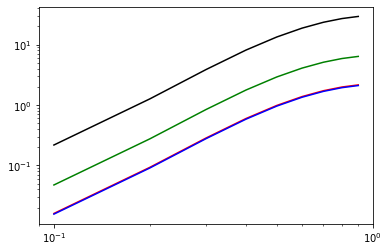

In [40]:
pl.plot(r, number_col_array, "black")
pl.plot(r, number_col_array_ij, "red")
pl.plot(r, number_col_array_ik, "green")
pl.plot(r, number_col_array_jk, "blue")
#pl.axhline(N_i, color="orange", linestyle="dashed")
#pl.axhline(N_j, color="purple", linestyle="dashed")
#pl.axhline(N_i_2, color="orange", linestyle="dashed")
#pl.axhline(N_j_2, color="orange", linestyle="dashed")
pl.xscale("log")
pl.yscale("log")
pl.show()